# Solve and Plot ODE Solution

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import init_session

init_session(use_latex='mathjax', ipython = True)

IPython console for SymPy 1.6.1 (Python 3.8.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
# Allow user to input values for mass and drag coefficient.

m = float(input('Mass:\n> '))
k = float(input('Drag Coefficient:\n> '))
g = 9.8

print("Mass: " + str(m))
print("Drag Coefficient: " + str(k))
print("g: " + str(g))

Mass: 10.0
Drag Coefficient: 2.0
g: 9.8


In [9]:
# Define symbols
v = symbols('v', cls = Function)
t = symbols('t')

# Define ODE
diff_eqn = Equality(g*m - k * v(t) - m * v(t).diff(t),0)

# Display the ODE
print("Differential equation to solve: ")
display(diff_eqn)

Differential equation to solve: 


                 d                  
-2.0⋅v(t) - 10.0⋅──(v(t)) + 98.0 = 0
                 dt                 

In [10]:
#Find a general solution
gen_sol = dsolve(diff_eqn)
print("General solution: ")
display(gen_sol)


General solution: 


           -0.2⋅t       
v(t) = C₁⋅ℯ       + 49.0

In [18]:
# Solution is generated with an arbitrary constant C1 which we have to define as a symbol.
C1 = Symbol('C1')

# Find the value of C1 given v(0) = 0. 
# The curly brackets form a dictionary https://www.w3schools.com/python/python_dictionaries.asp
# The [0] specifies the first solution.
C1_val = solve(gen_sol.subs({t: 0, v(t): 0}), C1)[0]

#Display value of constant.
print("Given v=0 when t=0: ")
display(Eq(C1, C1_val))


Given v=0 when t=0: 


C₁ = -49.0

In [13]:
# Subsitute the specifc value we found for C1 into the general solution.
specific_sol = gen_sol.subs(C1, C1_val)
print("Specific solution: ")
display(specific_sol)

Specific solution: 


                    -0.2⋅t
v(t) = 49.0 - 49.0⋅ℯ      

In [7]:
# In order to then use our solution to rapidly calculate values it is best practice to convert it to a numpy lambda function.
np_func = lambdify(t, specific_sol.rhs,'numpy')
print("When t = 5, v = " + str(np_func(5)))

When t = 5, v = 30.973907382599325


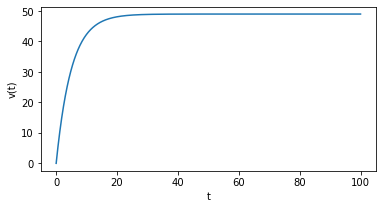

In [8]:
# Create a list of x values from 0 to 100 going up in 0.1
xvals = np.arange(0,100,.1)

# For each x value calculate a y value.
yvals = np_func(xvals)

# Set up a figure and axis.
%matplotlib inline
fig, ax = plt.subplots(1,1,subplot_kw=dict(aspect='equal'))  

# Plot values.
ax.plot(xvals, yvals)

# Label axis.
ax.set_xlabel('t')
ax.set_ylabel('v(t)')

# Show the plot.
plt.show()